# Imports

In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pylab as plt

# Functions

In [3]:
def graph_bar(kind, dataframe, column, title, legend, color):
    
    if kind == 'vertical':
        
        dataframe[column].plot.barh(title = title, grid = 1, yticks = [i for i in range(0,int(dataframe[column].max()),5)], 
                                   rot=0, fontsize = 13, color = color, figsize = (15,10))
        plt.show();
    
    elif kind == 'horizontal':
        dataframe[column].plot.bar(title = title, grid = 1, yticks = [i for i in range(0,int(dataframe[column].max()),5)], 
                                   rot=0, fontsize = 13, color = color, figsize = (15,10))
        plt.show();
        
    elif kind == 'stacked':
         dataframe[column].plot.bar(title = title, grid = 1, yticks = [i for i in range(0,int(dataframe[column].max()),5)], 
                                   rot=0, fontsize = 13, color = color, stacked = True, 
                                    figsize = (15,10))

In [4]:
def sort_data(dataframe, column):
    
    return pd.DataFrame(dataframe[column].sort_values())

In [5]:
def clean_data():
    
    global db1
    db1 = db1[(db1.num_infections > 0)].reset_index()
    db1 = db1.drop(columns = ['index'], axis = 1)
    
    db1['date'] = pd.to_datetime(db1.date)
    
   
    db1['autonomous_region'] = db1.autonomous_region.apply(lambda x: 'Comunidad Valenciana' if x == 'Valenciana, Comunidad' else x)
    db1['autonomous_region'] = db1.autonomous_region.apply(lambda x: 'Comunidad de Madrid' if x == 'Madrid, Comunidad de' else x)
    db1['autonomous_region'] = db1.autonomous_region.apply(lambda x: 'Región de de Murcia' if x == 'Murcia, Región de' else x)
    db1['autonomous_region'] = db1.autonomous_region.apply(lambda x: 'Comunidad Foral de Navarra' if x == 'Navarra, Comunidad Foral de' else x)
    db1['autonomous_region'] = db1.autonomous_region.apply(lambda x: 'Principado de Asturias' if x == 'Asturias, Principado de' else x)
    
    
    db1['province'] = db1.province.apply(lambda x: 'Alicante' if x == 'Alicante/Alacant' else x)
    db1['province'] = db1.province.apply(lambda x: 'Castellón' if x == 'Castellón/Castelló' else x)
    db1['province'] = db1.province.apply(lambda x: 'Araba' if x == 'Araba/Álava' else x)
    
    db1['sex'] = db1.sex.apply(lambda x: 'UKNOWN' if x == 'NC' else x)
    
    db1['age_interval'] = db1.age_interval.apply(lambda x: 'UKNOWN' if x == 'NC' else x)

In [6]:
def cumulative(dataframe):
    
    cumu_num_infections = dataframe.num_infections.cumsum()
    cumu_num_hosp = dataframe.num_hosp.cumsum()
    cumu_num_uci = dataframe.num_uci.cumsum()
    cumu_num_dead = dataframe.num_dead.cumsum()

    cumulative = pd.DataFrame({'cumu_num_infections': cumu_num_infections, 'cumu_num_hosp': cumu_num_hosp, 
                               'cumu_num_uci': cumu_num_uci, 'cumu_num_dead': cumu_num_dead})
    dataframe = pd.concat([dataframe, cumulative], axis = 1)
    return dataframe

In [7]:
def overview(dataframe, title):
    
    if title == 'evolution':
        plt.rcParams['figure.figsize']=(15, 15)
        fig, axs = plt.subplots(4)
        fig.suptitle('Pandemic evolution')
        axs[0].plot(dataframe.date, dataframe.num_infections)
        axs[0].set_title('Number of infections')
        axs[1].plot(dataframe.date, dataframe.num_hosp)
        axs[1].set_title('Number of hospitalisations')
        axs[2].plot(dataframe.date, dataframe.num_uci)
        axs[2].set_title('Number of Intensive Care Unit')
        axs[3].plot(dataframe.date, dataframe.num_dead)
        axs[3].set_title('Number of deaths')
    
    if title == 'Number of infections':
        fig, axs = plt.subplots(3)
        fig.suptitle(title)
        axs[0].plot(dataframe.date, dataframe.num_infections)
        axs[0].set_title('Daily')
        axs[1].plot(dataframe.date, dataframe.ave_7_num_infections)
        axs[1].set_title('Moving 7 day average')
        axs[2].plot(dataframe.date, dataframe.cumu_num_infections)
        axs[2].set_title('Cumulative')
        plt.rcParams['figure.figsize']=(15, 15);
        
    elif title == 'Number of hospitalisations':
        fig, axs = plt.subplots(3)
        fig.suptitle(title)
        axs[0].plot(dataframe.date, dataframe.num_hosp)
        axs[0].set_title('Daily')
        axs[1].plot(dataframe.date, dataframe.ave_7_num_hosp)
        axs[1].set_title('Moving 7 day average')
        axs[2].plot(dataframe.date, dataframe.cumu_num_hosp)
        axs[2].set_title('Cumulative')
        plt.rcParams['figure.figsize']=(15, 15);
    
    elif title == 'Number of Intensive Care Units':
        fig, axs = plt.subplots(3)
        fig.suptitle(title)
        axs[0].plot(dataframe.date, dataframe.num_uci)
        axs[0].set_title('Daily')
        axs[1].plot(dataframe.date, dataframe.ave_7_num_uci)
        axs[1].set_title('Moving 7 day average')
        axs[2].plot(dataframe.date, dataframe.cumu_num_uci)
        axs[2].set_title('Cumulative')
        plt.rcParams['figure.figsize']=(15, 15);
        
    elif title == 'Number of deaths':
        fig, axs = plt.subplots(3)
        fig.suptitle(title)
        axs[0].plot(dataframe.date, dataframe.num_dead)
        axs[0].set_title('Daily')
        axs[1].plot(dataframe.date, dataframe.ave_7_num_dead)
        axs[1].set_title('Moving 7 day average')
        axs[2].plot(dataframe.date, dataframe.cumu_num_dead)
        axs[2].set_title('Cumulative')
        plt.rcParams['figure.figsize']=(15, 15);

In [8]:
def graph_bar(kind, dataframe, column, title, color):
    
    if kind == 'vertical':
        
        dataframe[column].plot.barh(title = title, grid = 1, yticks = [i for i in range(0,int(dataframe[column].max()),5)], 
                                   rot=0, fontsize = 13, color = color, figsize = (15,10))
        plt.show();
    
    elif kind == 'horizontal':
        dataframe[column].plot.bar(title = title, grid = 1, yticks = [i for i in range(0,int(dataframe[column].max()),5)], 
                                   rot=0, fontsize = 13, color = color, figsize = (15,10))
        plt.show();

In [9]:
def freq_rel(dataframe):
    
    dataframe['Number of infection (%)'] = [round(i/ dataframe['num_infections'].sum(),3)*100 for i in dataframe['num_infections']]
    dataframe['Number of hospitalisation (%)'] = [round(i/ dataframe['num_hosp'].sum(),3)*100 for i in dataframe['num_hosp']]
    dataframe['Number of Intensive Care Unit (%)'] = [round(i/ dataframe['num_uci'].sum(),3)*100 for i in dataframe['num_uci']]
    dataframe['Number of deaths (%)'] = [round(i/ dataframe['num_dead'].sum(),3)*100 for i in dataframe['num_dead']]

In [10]:
def organise(column):
    
    name = db1.groupby(column).sum()
    freq_rel(name)
    
    return name

In [11]:
def mov_7_ave(dataframe):
    dataframe['ave_7_num_infections'] = dataframe.iloc[:,1].rolling(window=7).mean()
    dataframe['ave_7_num_hosp'] = dataframe.iloc[:,2].rolling(window=7).mean()
    dataframe['ave_7_num_uci'] = dataframe.iloc[:,3].rolling(window=7).mean()
    dataframe['ave_7_num_dead'] = dataframe.iloc[:,4].rolling(window=7).mean()
    
    return dataframe

In [12]:
def severe_cases(dataframe):
    
     dataframe[['Number of hospitalisation (%)', 'Number of Intensive Care Unit (%)',
                    'Number of deaths (%)']].plot.bar(title = 'Severe Cases', grid = 1, 
                    yticks = [i for i in range(0,100,10)], 
                    rot=0, fontsize = 13, color = ['Darkblue', 'Orange', 'Darkred'], stacked = True, figsize = (15,10))

## Source - Data Market:
https://datamarket.es/#covid-19-dataset

We'll first explore the different data sets one can find in different sources regarding the covid information for Spain

In [13]:
db1 =pd.read_csv('../covid-19-sample.csv')

In [14]:
db1.shape

(822120, 9)

## Data description

+ age_interval: Intervalo de años en el cual se ubica el grupo de análisis.
+ autonomous_region: Comunidad autónoma donde se registran los datos.
+ date: Fecha del momento en el cual se obtuvieron los datos.
+ num_dead: Número de muertes que se han producido en el grupo de análisis.
+ num_hosp: Número de hospitalizaciones que ha tenido el grupo de análisis.
+ num_infections: Número de infecciones que han se han reportado en el grupo de análisis.
+ num_uci: Número de ingresos en la Unidad de Cuidados Intensivos que ha tenido el grupo de análisis.
+ province: Provincia donde se registran los datos.
+ sex: Sexo del grupo de análisis (H, M, NC).


#### Data cleaning

In [15]:
db1

,date,autonomous_region,province,sex,age_interval,num_infections,num_hosp,num_uci,num_dead
0,2020-01-01,"Valenciana, Comunidad",Alicante/Alacant,H,0-9,0,0,0,0
1,2020-01-01,"Valenciana, Comunidad",Alicante/Alacant,H,10-19,0,0,0,0
2,2020-01-01,"Valenciana, Comunidad",Alicante/Alacant,H,20-29,0,0,0,0
3,2020-01-01,"Valenciana, Comunidad",Alicante/Alacant,H,30-39,0,0,0,0
4,2020-01-01,"Valenciana, Comunidad",Alicante/Alacant,H,40-49,0,0,0,0
...,...,...,...,...,...,...,...,...,...
822115,2021-06-10,Castilla y León,Zamora,NC,50-59,0,0,0,0
822116,2021-06-10,Castilla y León,Zamora,NC,60-69,0,0,0,0
822117,2021-06-10,Castilla y León,Zamora,NC,70-79,0,0,0,0
822118,2021-06-10,Castilla y León,Zamora,NC,80+,0,0,0,0


In [16]:
clean_data()

### autonomous_region:

In [17]:
db1.autonomous_region.unique()

array(['Comunidad Valenciana', 'Castilla-La Mancha', 'Andalucía',
       'Castilla y León', 'Catalunya', 'Extremadura', 'País Vasco',
       'Galicia', 'Ceuta', 'Canarias', 'Aragón', 'La Rioja',
       'Comunidad de Madrid', 'Melilla', 'Región de de Murcia',
       'Comunidad Foral de Navarra', 'Principado de Asturias',
       'Illes Balears', 'Cantabria'], dtype=object)

In [18]:
region = organise('autonomous_region')

In [19]:
region

,num_infections,num_hosp,num_uci,num_dead,Number of infection (%),Number of hospitalisation (%),Number of Intensive Care Unit (%),Number of deaths (%)
autonomous_region,,,,,,,,
Andalucía,595143,46324,5201,9291,16.0,13.1,15.6,12.3
Aragón,124109,12338,1172,3202,3.3,3.5,3.5,4.2
Canarias,56521,4887,1084,622,1.5,1.4,3.3,0.8
Cantabria,30588,3207,460,514,0.8,0.9,1.4,0.7
Castilla y León,226046,25522,2105,5886,6.1,7.2,6.3,7.8
Castilla-La Mancha,194700,18347,1366,5395,5.2,5.2,4.1,7.1
Catalunya,624497,40671,3476,14304,16.8,11.5,10.4,18.9
Ceuta,5957,287,33,60,0.2,0.1,0.1,0.1
Comunidad Foral de Navarra,63099,5745,555,1099,1.7,1.6,1.7,1.5


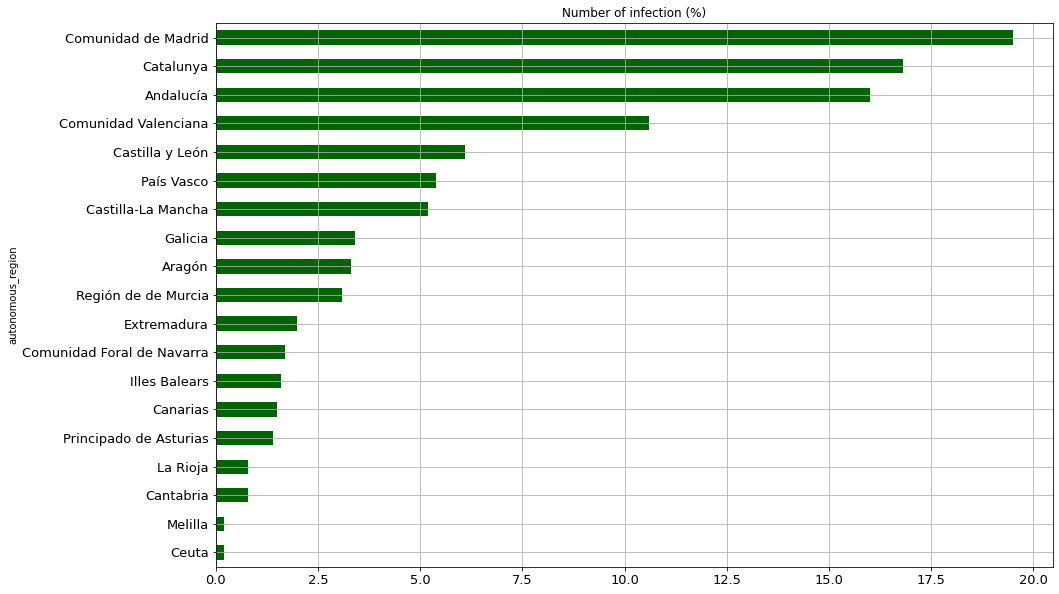

In [20]:
graph_bar('vertical', sort_data(region, 'Number of infection (%)'), 
          'Number of infection (%)', 'Number of infection (%)', 'Darkgreen')

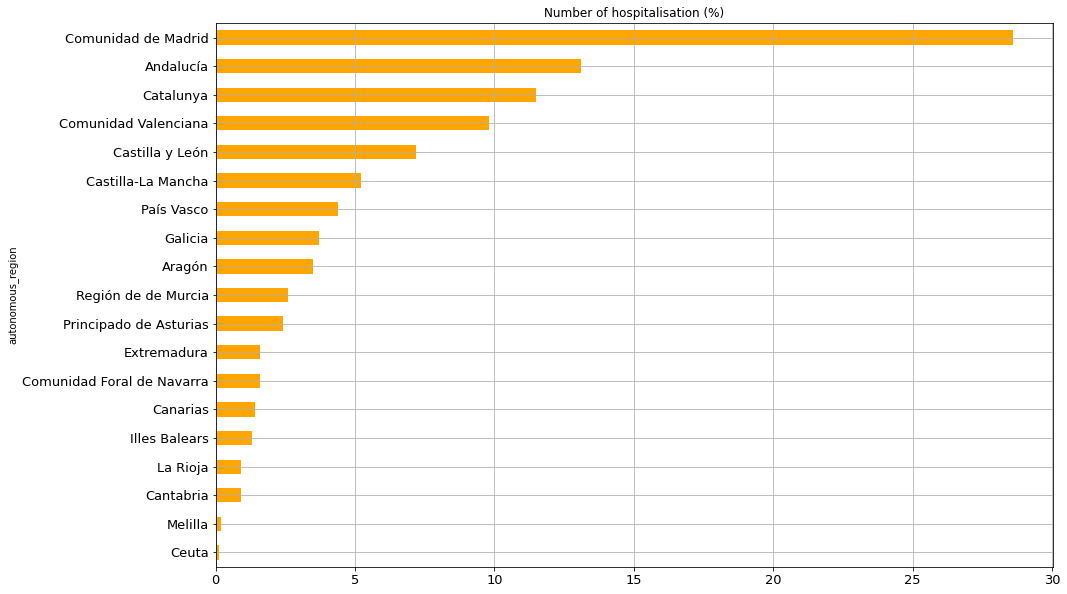

In [21]:
graph_bar('vertical', sort_data(region, 'Number of hospitalisation (%)'), 
          'Number of hospitalisation (%)', 'Number of hospitalisation (%)', 'Orange')

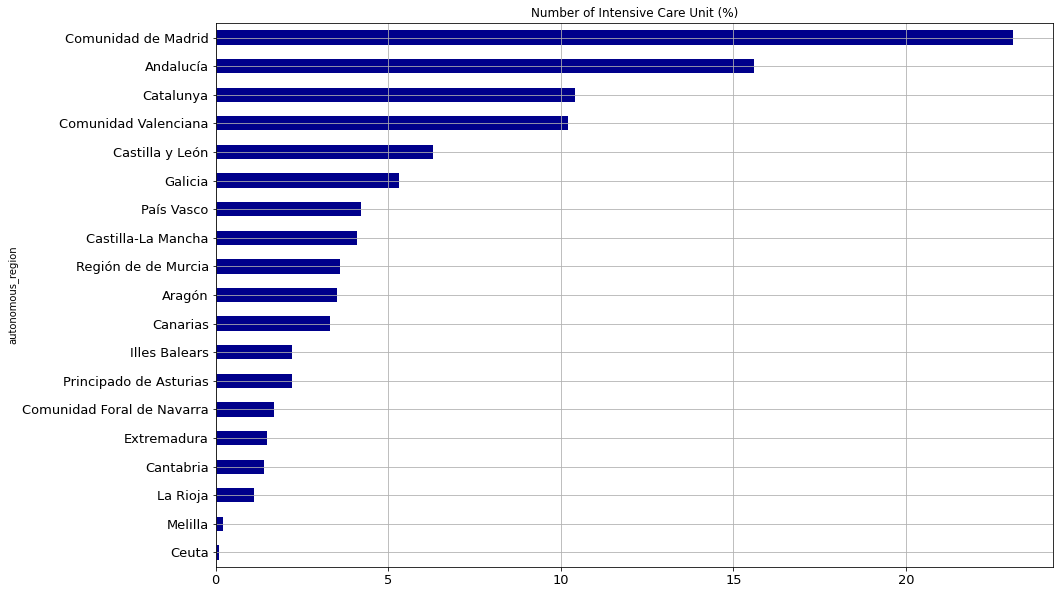

In [22]:
graph_bar('vertical', sort_data(region, 'Number of Intensive Care Unit (%)'), 
          'Number of Intensive Care Unit (%)', 'Number of Intensive Care Unit (%)', 'Darkblue')

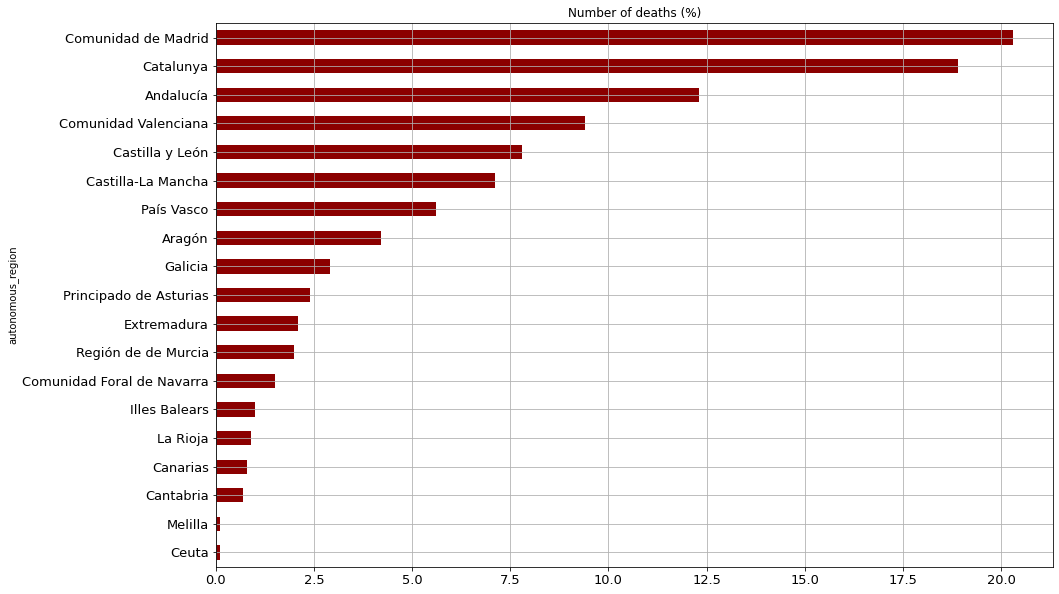

In [23]:
graph_bar('vertical', sort_data(region, 'Number of deaths (%)'), 
          'Number of deaths (%)', 'Number of deaths (%)', 'Darkred')

## province:

In [24]:
db1.province.unique()

array(['Alicante', 'Albacete', 'Almería', 'Ávila', 'Barcelona', 'Badajoz',
       'Bizkaia', 'Burgos', 'A Coruña', 'Cádiz', 'Cáceres', 'Ceuta',
       'Córdoba', 'Ciudad Real', 'Castellón', 'Cuenca', 'Las Palmas',
       'Girona', 'Granada', 'Guadalajara', 'Huelva', 'Huesca', 'Jaén',
       'Lleida', 'León', 'La Rioja', 'Lugo', 'Madrid', 'Málaga',
       'Melilla', 'Murcia', 'Navarra', 'Asturias', 'Ourense', 'Palencia',
       'Illes Balears', 'Pontevedra', 'Cantabria', 'Salamanca', 'Sevilla',
       'Segovia', 'Soria', 'Gipuzkoa', 'Tarragona', 'Teruel',
       'Santa Cruz de Tenerife', 'Toledo', 'Valencia/València',
       'Valladolid', 'Araba', 'Zaragoza', 'Zamora'], dtype=object)

In [25]:
province = organise('province')

### Number of infection

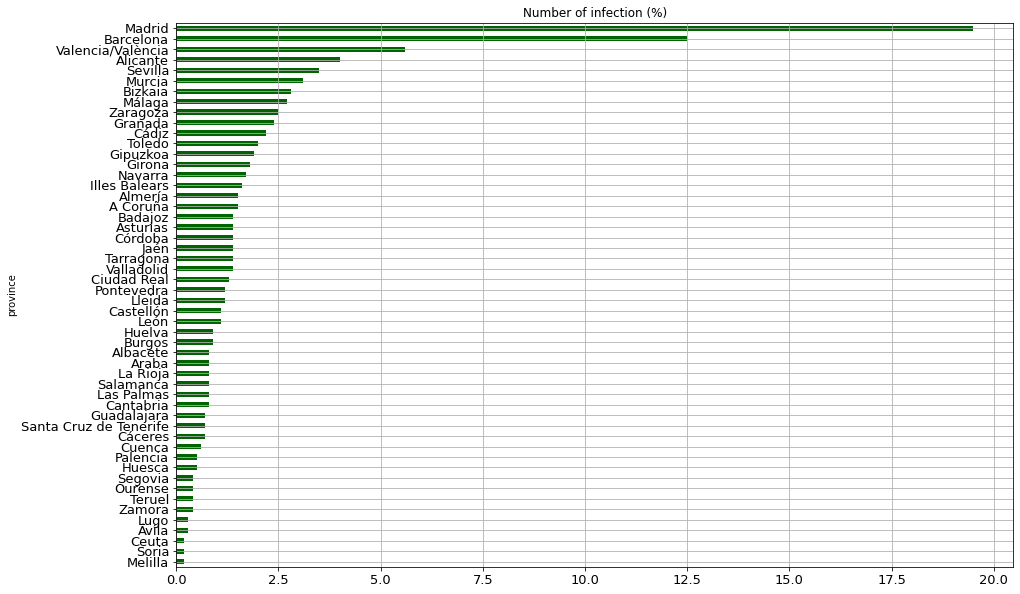

In [26]:
graph_bar('vertical', sort_data(province, 'Number of infection (%)'), 
          'Number of infection (%)', 'Number of infection (%)', 'Darkgreen')

### Number of hospitalisation

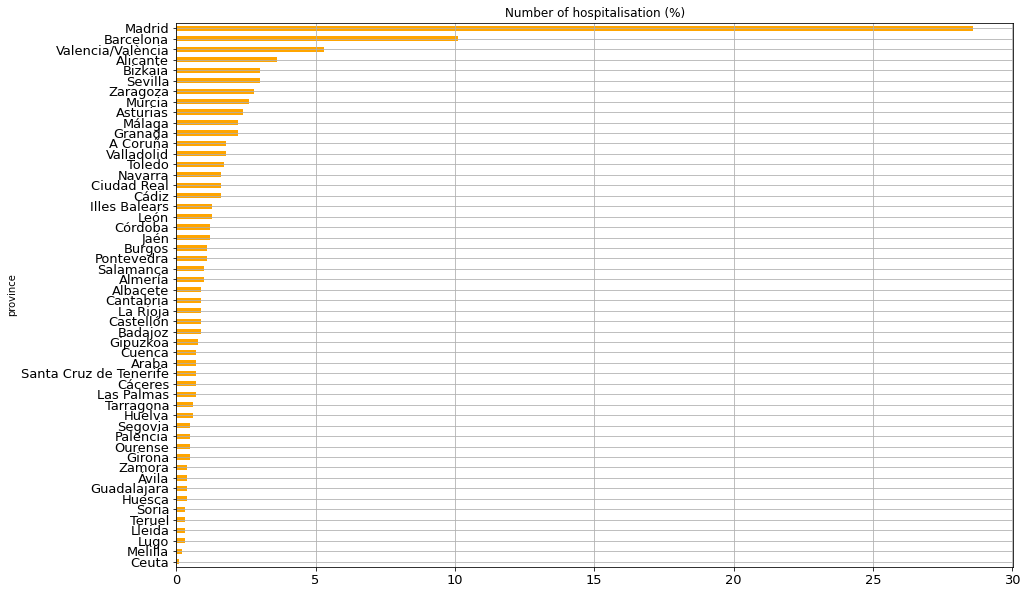

In [27]:
graph_bar('vertical', sort_data(province, 'Number of hospitalisation (%)'), 
          'Number of hospitalisation (%)', 'Number of hospitalisation (%)', 'Orange')

### Number of Intensive Care Unit

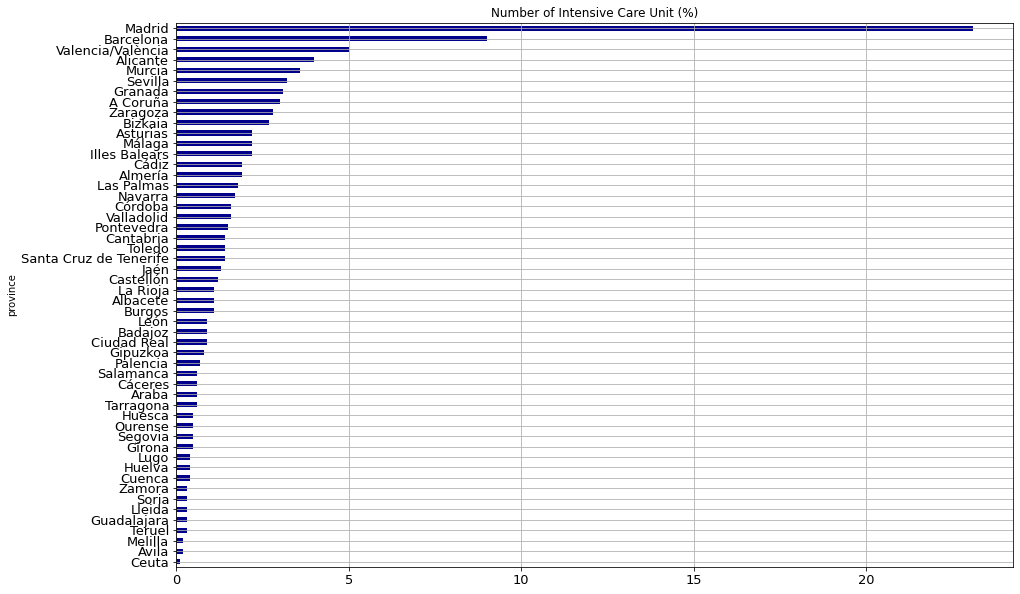

In [28]:
graph_bar('vertical', sort_data(province, 'Number of Intensive Care Unit (%)'), 
          'Number of Intensive Care Unit (%)', 'Number of Intensive Care Unit (%)', 'Darkblue')

### Number of deaths

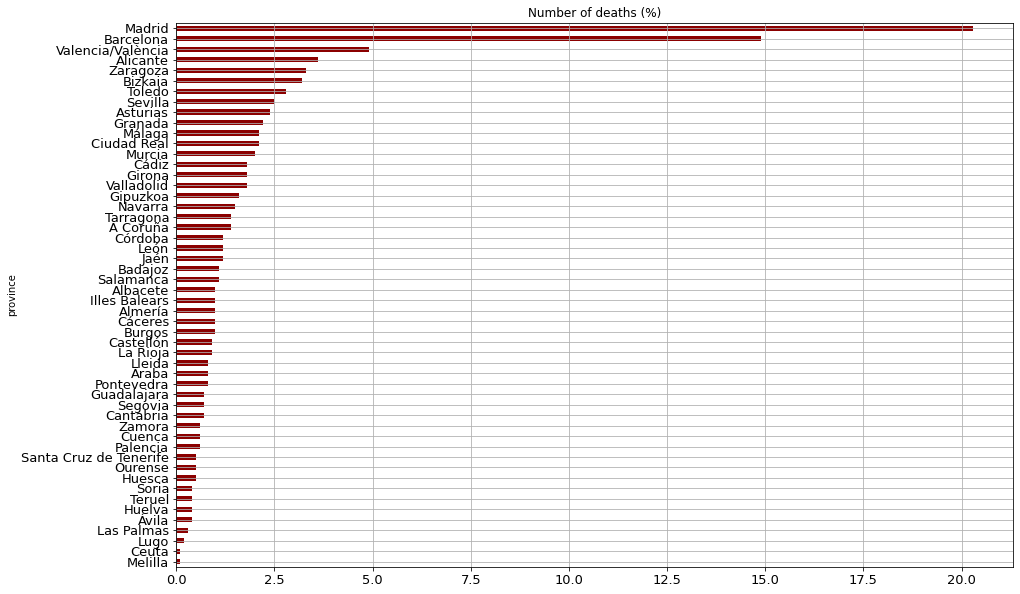

In [29]:
graph_bar('vertical', sort_data(province, 'Number of deaths (%)'), 
          'Number of deaths (%)', 'Number of deaths (%)', 'Darkred')

## Pandemic Evolution

In [30]:
db1

,date,autonomous_region,province,sex,age_interval,num_infections,num_hosp,num_uci,num_dead
0,2020-03-02,Comunidad Valenciana,Alicante,H,60-69,1,1,0,0
1,2020-03-02,Comunidad Valenciana,Alicante,H,70-79,1,1,0,0
2,2020-03-02,Comunidad Valenciana,Alicante,M,30-39,1,0,0,0
3,2020-03-02,Comunidad Valenciana,Alicante,M,70-79,1,0,0,0
4,2020-03-02,Comunidad Valenciana,Alicante,M,80+,1,0,0,0
...,...,...,...,...,...,...,...,...,...
300931,2021-06-10,Castilla y León,Zamora,H,50-59,2,0,0,0
300932,2021-06-10,Castilla y León,Zamora,M,10-19,3,0,0,0
300933,2021-06-10,Castilla y León,Zamora,M,20-29,2,0,0,0
300934,2021-06-10,Castilla y León,Zamora,M,40-49,1,0,0,0


In [31]:
bydate = db1.groupby('date').sum().reset_index()

In [32]:
bydate = cumulative(bydate)

In [33]:
bydate = mov_7_ave(bydate)

In [34]:
bydate.shape

(480, 13)

## Moving average

We inspected that using a moving average of 7 days we can reduce the white noise of the the curves. This is due to the fact that the numbers were comunicated on a weekly basis to the goverment of Spain:

In [62]:
def inspect_mov_ave(dataframe):
    
      
    dataframe = dataframe.copy()
    
    dataframe = dataframe[['date', 'num_infections']]
    
    for i in range(1, 15, 2):
        dataframe[f'move_ave_{i}'] = dataframe.iloc[:,1].rolling(window=i).mean()
    
    fig, axs = plt.subplots(len(dataframe.columns))
    for i in range(1, len(dataframe.columns)):
        axs[i].plot(dataframe.date, dataframe[str(dataframe.columns[i])])
        axs[i].set_title(str(dataframe.columns[i]))
        plt.rcParams['figure.figsize']=(20, 20)

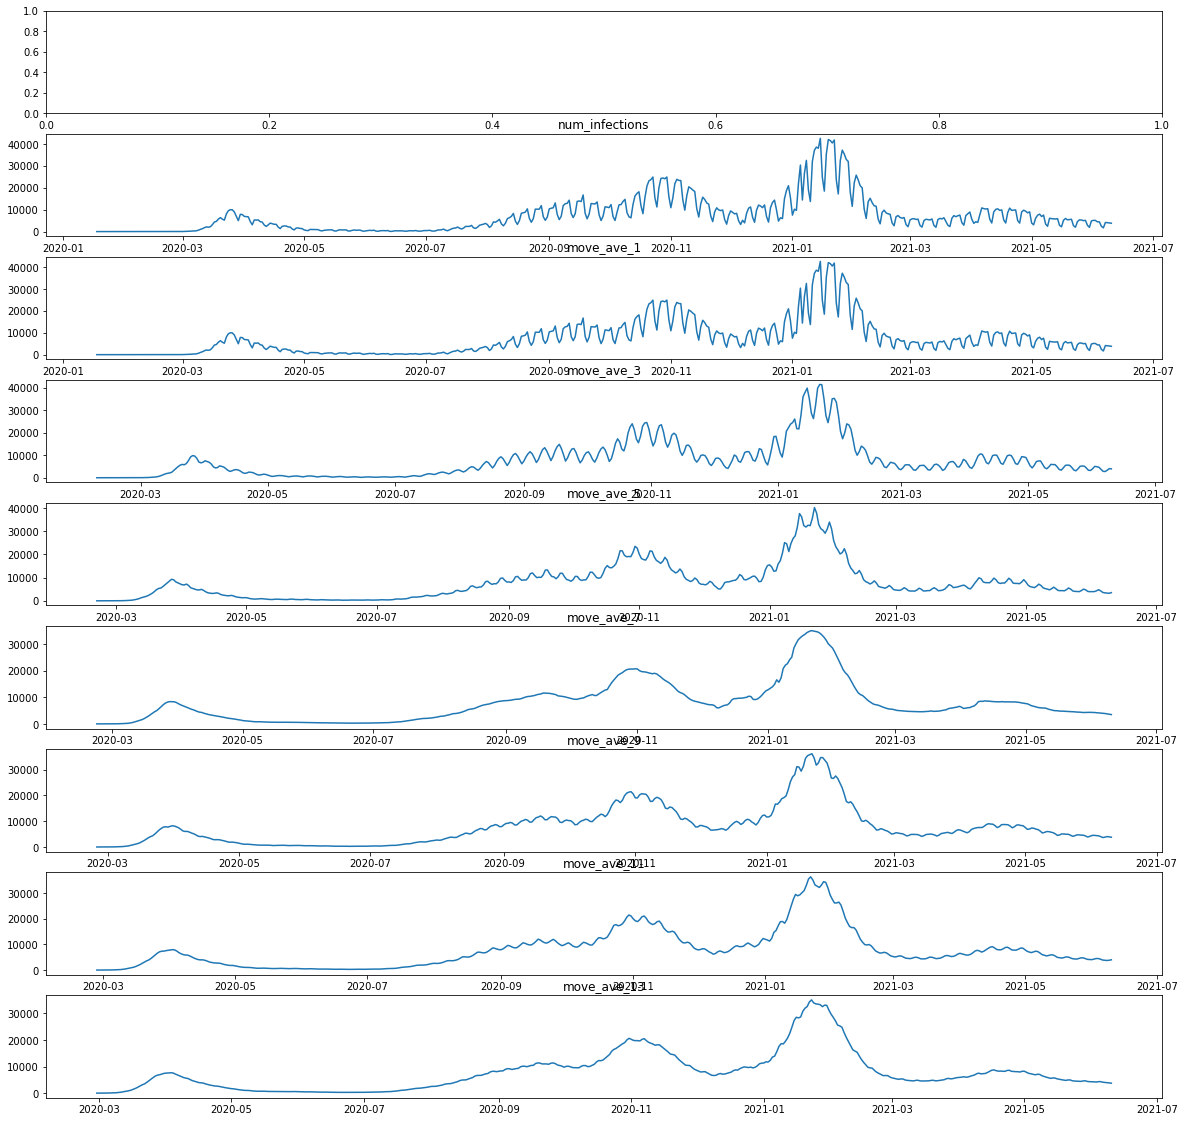

In [63]:
inspect_mov_ave(bydate)

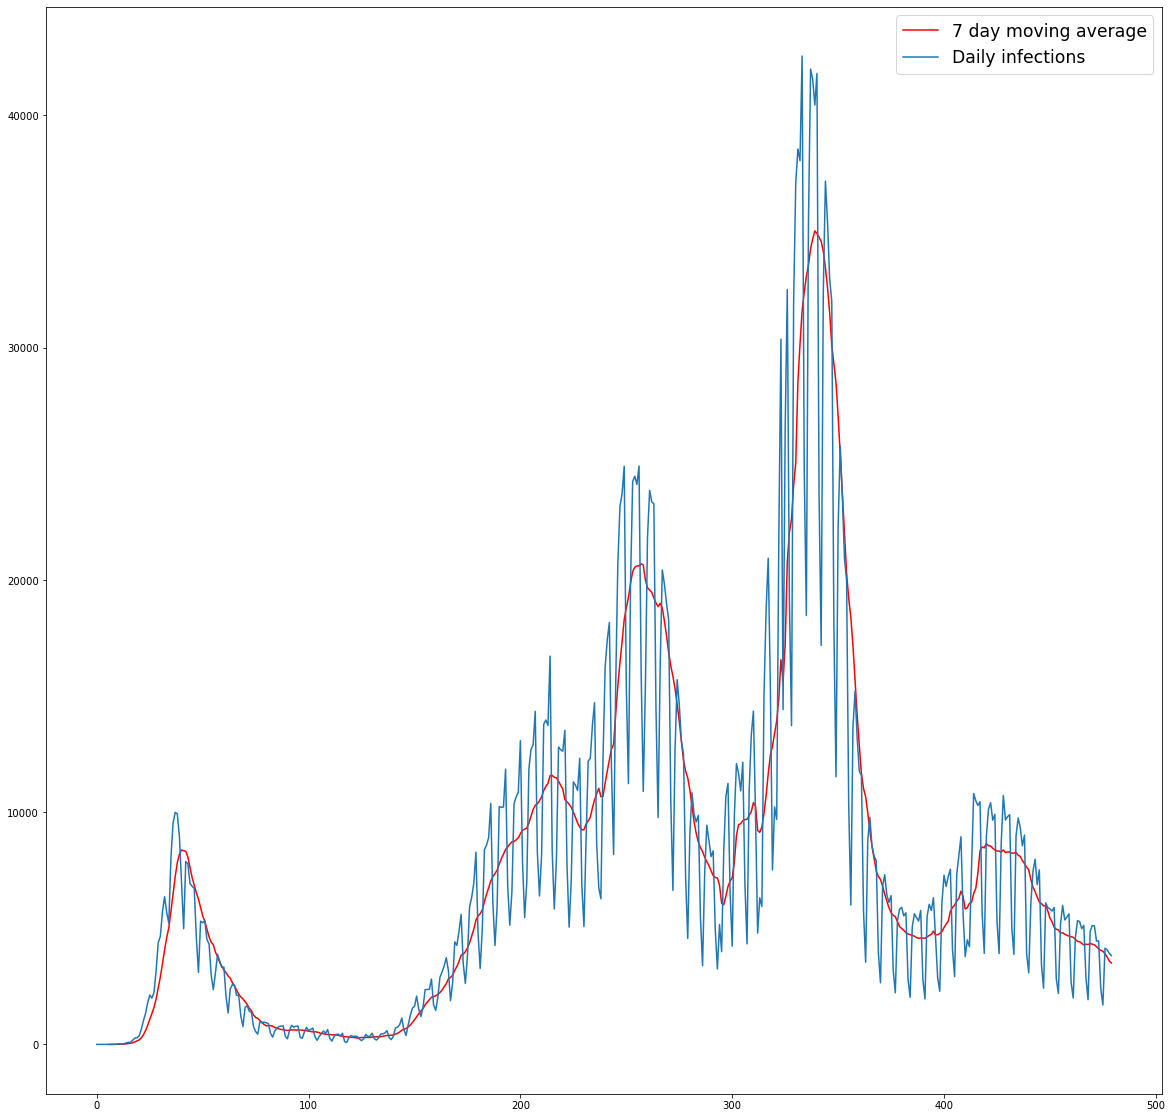

In [76]:
#plt.plot(df.move_ave_5, 'r')
plt.plot(bydate.ave_7_num_infections, 'r', label = '7 day moving average')
#plt.plot(df.move_ave_9)
plt.plot(bydate.num_infections, label = 'Daily infections')
plt.legend(fontsize = 'xx-large');

In [ ]:
overview(bydate, 'evolution')

### Number of infections

In [ ]:
overview(bydate, 'Number of infections')

### Number of hospitalisations

In [ ]:
overview(bydate, 'Number of hospitalisations')

### Intensive Care Units

In [ ]:
overview(bydate, 'Number of Intensive Care Units')

### Deaths

In [ ]:
overview(bydate, 'Number of deaths')

## Age:

In [ ]:
ages = organise('age_interval')

#### UKNOWN age is not significative. Let's drop this to have a cleaner view

In [ ]:
ages = ages.drop('UKNOWN', axis = 0)

In [ ]:
ages

### Number of infections

In [ ]:
graph_bar('horizontal', ages, 'Number of infection (%)',
          'Number of infection (%)', 'Darkgreen')

### Number of hospitalisation

In [ ]:
graph_bar('horizontal', ages, 'Number of hospitalisation (%)',
          'Number of hospitalisation (%)', 'Orange')

### Number of Intensive Care Unit

In [ ]:
graph_bar('horizontal', ages, 'Number of Intensive Care Unit (%)',
          'Number of Intensive Care Unit (%)', 'Darkblue')

### Number of deaths

In [ ]:
graph_bar('horizontal', ages, 'Number of deaths (%)',
          'Number of deaths (%)', 'Darkred')

### Severe cases

In [ ]:
severe_cases(ages)

## Sex:

In [ ]:
gender = ages = organise('sex')

In [ ]:
gender = gender.drop('UKNOWN', axis = 0)

### Number of infections

In [ ]:
graph_bar('horizontal', gender, 'Number of infection (%)',
          'Number of infection (%)', 'Darkgreen')

### Number of hospitalisation

In [ ]:
graph_bar('horizontal', gender, 'Number of hospitalisation (%)',
          'Number of hospitalisation (%)', 'Orange')

### Number of Intensive Care Unit

In [ ]:
graph_bar('horizontal', gender, 'Number of Intensive Care Unit (%)',
          'Number of Intensive Care Unit (%)', 'Darkblue')

### Number of deaths

In [ ]:
graph_bar('horizontal', gender, 'Number of deaths (%)',
          'Number of deaths (%)', 'Darkred')

## Last seven days

In [ ]:
last7 = bydate.tail(7)

In [ ]:
last7

In [ ]:
overview(last7, 'Number of infections')

In [ ]:
overview(last7, 'Number of hospitalisations')

In [ ]:
overview(last7, 'Number of Intensive Care Units')

In [ ]:
overview(last7, 'Number of deaths')

## Seasonality

In [ ]:
import statsmodels.api as sm

In [ ]:
july = bydate[bydate.date >= '2020-07-01'].set_index('date')
july = july.num_infections
res=sm.tsa.seasonal_decompose(july)
resplot=res.plot()

In [ ]:
july = bydate[bydate.date >= '2020-07-01'].set_index('date')
july = july.ave_7_num_infections
res=sm.tsa.seasonal_decompose(july)
resplot=res.plot()

# Autoregression

In [ ]:
from pandas.plotting import lag_plot

In [ ]:
lag_plot(bydate.num_infections)

# Prediction using ARMA

We will predict the Number of infections, Number of hospitalisations, Number of Intense Care Units and Number of deaths using ARMA model. We'll use this model to predict the number of cases for 1, 3, 5 and 7 days

In [ ]:
from statsmodels.tsa.arima_model import ARMA

In [ ]:
from sklearn.metrics import mean_squared_error as mse

## Infections

In [ ]:
infections = bydate[['date', 'ave_7_num_infections']].set_index('date')
infections = infections[6:]

In [ ]:
infections

#### 1 day

In [ ]:
train, test = infections[:-1], infections[-1:]

The values of p and q have been simulated to minimise the mean square error:

p = 4

q = 2

In [ ]:
model=ARMA(train, order = (4, 2)).fit(disp=False)

In [ ]:
print('mse = ', mse(model.predict(len(train), len(infections)-1), test)**0.5, 'daily infections')

In [ ]:
prediction = pd.DataFrame(model.predict(), columns = ['pred'])

In [ ]:
prediction

In [ ]:
bydate[['date', 'ave_7_num_infections']].set_index('date')

In [ ]:
model.predict('2021-06-10')

In [ ]:
plt.plot(prediction.pred, 'r', label='prediction')
#plt.plot(bydate.num_infections)
plt.plot(bydate[['date', 'ave_7_num_infections']].set_index('date'), label = 'values');

#### 3 days

In [ ]:
train, test = infections[:-3], infections[-3:]

The values of p and q have been simulated to minimise the mean square error:

p = 4

q = 12

In [ ]:
model=ARMA(train, order = (4, 12)).fit(disp=False)

In [ ]:
print('mse = ', mse(model.predict(len(train), len(infections)-1), test)**0.5, 'daily infections')

In [ ]:
prediction_3 = pd.DataFrame(model.predict(), columns = ['pred_3'])

In [ ]:
plt.plot(prediction_3.pred_3, 'r', label='prediction')
#plt.plot(bydate.num_infections)
plt.plot(bydate[['date', 'ave_7_num_infections']].set_index('date'), label = 'values');

### num_hosp:

In [ ]:
hosp = bydate[['date', 'ave_7_num_hosp']].set_index('date')
train, test = hosp[:-1], hosp[-1:]